In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 7)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# stub has_data_for_dates to always retun true to avoid requests on each run
import zipline.data.loader as zipline_data_loader
def has_data_for_dates_stub(*args):
    print('stubbed has_data_for_dates(series_or_df, %s, %s) returned true' % args[1:])
    return True
zipline_data_loader.has_data_for_dates = has_data_for_dates_stub

# save context to global variable
context = None
def save_context(ctx, results):
    global context
    context = ctx

In [6]:
import pytz
from datetime import datetime

capital_base = 1e5
start = datetime.strptime('Jan 1 2010', '%b %d %Y').replace(tzinfo=pytz.utc)
end = datetime.strptime('Jan 10 2010', '%b %d %Y').replace(tzinfo=pytz.utc)

import pandas as pd
data = pd.read_pickle('pd_panel_data.pickle')
print(data)

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 2558 (major_axis) x 6 (minor_axis)
Items axis: TSLA to rand
Major_axis axis: 2010-01-01 00:00:00 to 2017-01-01 00:00:00
Minor_axis axis: adj close to volume


In [7]:
num_mas = 2
def add_cols_to_panel(panel, num_mas):
    mas = [2 ** (x + 1) for x in range(num_mas)]
    for ma in mas:
        panel.loc[:,:,'MA_' + str(ma)] = 0
        panel.loc[:,:,'rMAD_' + str(ma)] = 0

def calc_rMADs(df, num_mas):
    mas = [2 ** (x + 1) for x in range(num_mas)]
    for ma in mas:
        df.loc[:, 'MA_' + str(ma)] = df['close'].rolling(ma).mean()
        df.loc[:, 'rMAD_' + str(ma)] = 1 - df['MA_' + str(ma)] / df['close']
        
add_cols_to_panel(data, num_mas)
calc_rMADs(data['rand'], num_mas)
data['rand'].head()
data.major_axis[0]

Timestamp('2010-01-01 00:00:00', offset='D')

In [8]:
from zipline.api import slippage, commission
from zipline.utils.calendars.calendar_utils import clear_calendars, register_calendar, get_calendar
from anytime_calendar import AnytimeCalendar

clear_calendars()
register_calendar('NYSE', AnytimeCalendar())

def initialize(context):
    context.sym = context.symbol('rand')
    context.set_slippage(slippage.FixedSlippage(spread=0))
    context.set_commission(commission.PerDollar(cost=0))
    context.set_benchmark(context.symbol('hor'))
    context.i = 0
    context.short_mavg_days = 1
    context.long_mavg_days = 3

In [26]:
def handle_data(context, data):
    context.i += 1
    context.order_target(context.sym, 10)
#     if context.i < context.long_mavg_days:
# #         print(dir(context))
#         return
#     short_mavg = data.history(context.sym, 'price', context.short_mavg_days, '1d').mean()
#     long_mavg = data.history(context.sym, 'price', context.long_mavg_days, '1d').mean()

#     if short_mavg > long_mavg:
#         context.order_target(context.sym, 100)
#     elif short_mavg < long_mavg:
#         context.order_target(context.sym, 0)

#     context.record(AAPL=data.current(context.sym, "price"),
#            short_mavg=short_mavg,
#            long_mavg=long_mavg)
    
    

In [27]:
import zipline    
results = zipline.run_algorithm(start=start, 
                                end=end, 
                                initialize=initialize, 
                                capital_base=capital_base, 
                                handle_data=handle_data, 
                                analyze=save_context,
                                data=data)


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
# results.head(1000)
# results.iloc[1]

stubbed has_data_for_dates(series_or_df, 1990-01-01 00:00:00+00:00, 2018-03-29 00:00:00+00:00) returned true
stubbed has_data_for_dates(series_or_df, 1990-01-01 00:00:00+00:00, 2018-03-29 00:00:00+00:00) returned true


In [33]:
type(context)

zipline.algorithm.TradingAlgorithm

Entire data start date: 2010-01-06
Entire data end date: 2010-01-08


Backtest Months: 0


Performance statistics,Backtest
annual_return,-0.10
annual_volatility,0.01
sharpe_ratio,nan
calmar_ratio,-79.75
stability_of_timeseries,-1.00
max_drawdown,-0.00
omega_ratio,0.00
sortino_ratio,-12.83
skew,0.52
kurtosis,-1.50


/home/tot/_tot/apps/anaconda3/envs/env-zipline/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,0.13,2010-01-06,2010-01-08,NaT,NaN
1,0.00,2010-01-06,2010-01-06,2010-01-06,1
2,0.00,2010-01-06,2010-01-06,2010-01-06,1
3,0.00,2010-01-06,2010-01-06,2010-01-06,1
4,0.00,2010-01-06,2010-01-06,2010-01-06,1




[-0.001    nan]


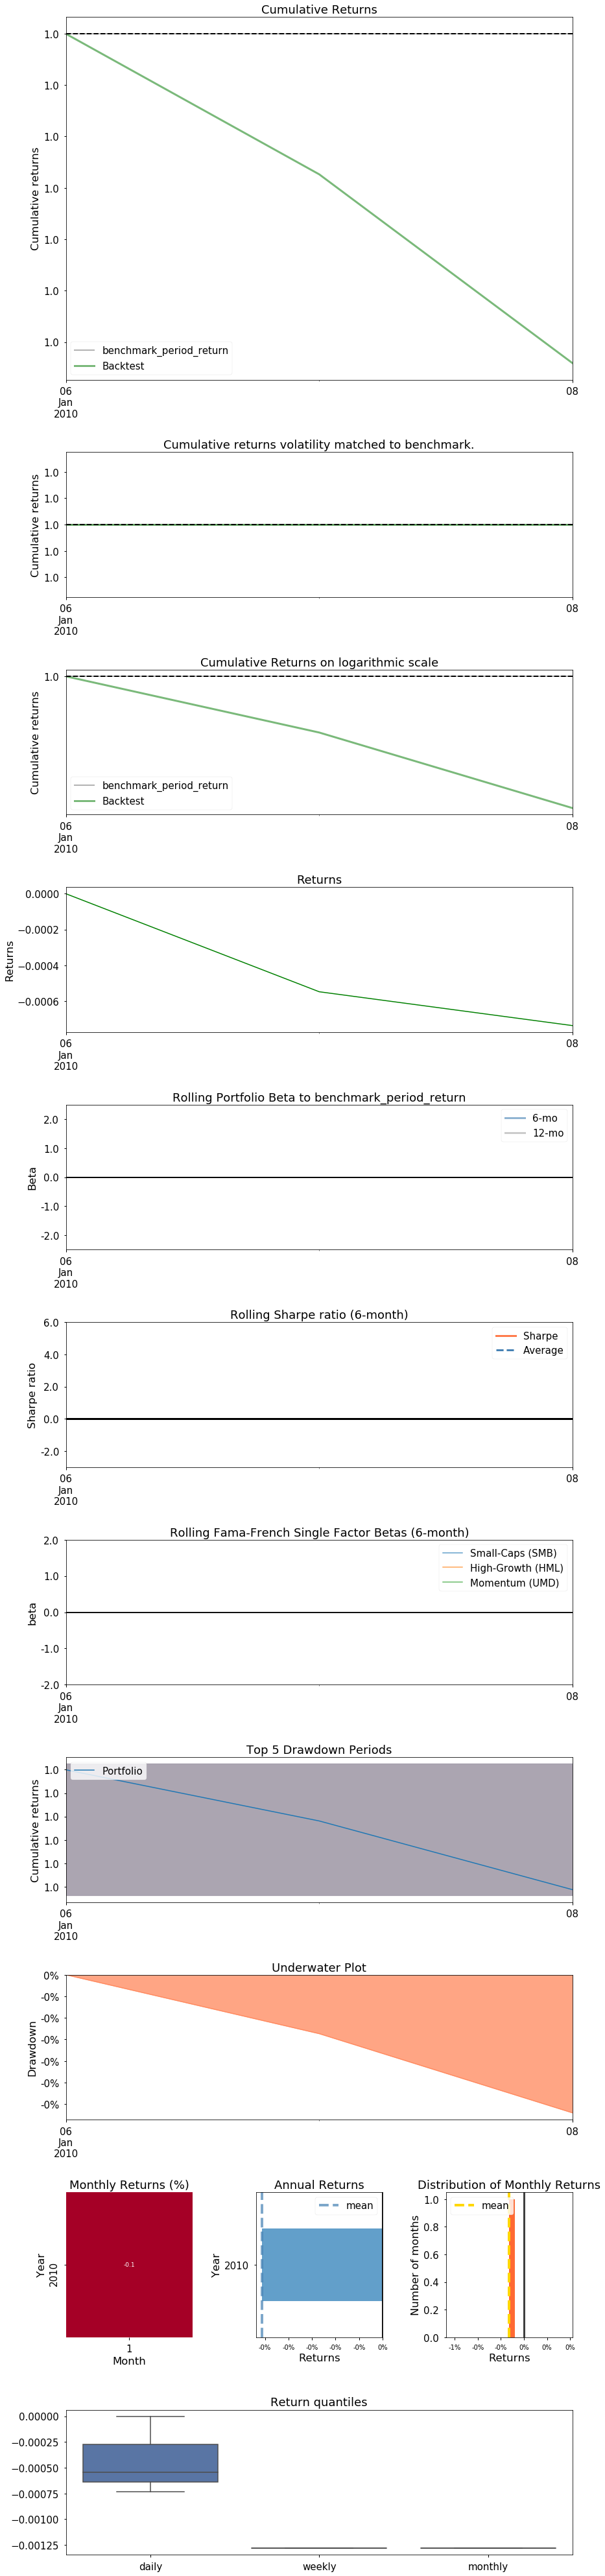

Stress Events,mean,min,max
Recovery,-0.04%,-0.07%,-0.00%


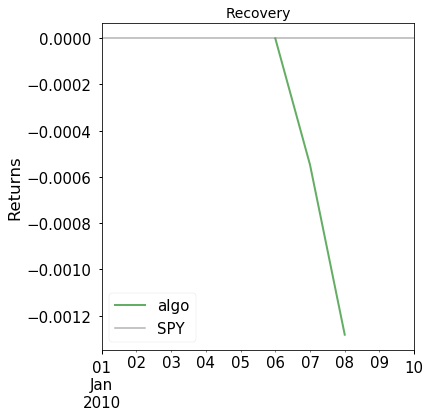

Top 10 long positions of all time,max
sid,
Equity(3 [RAND]),10.08%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
Equity(3 [RAND]),10.08%


All positions ever held,max
sid,
Equity(3 [RAND]),10.08%


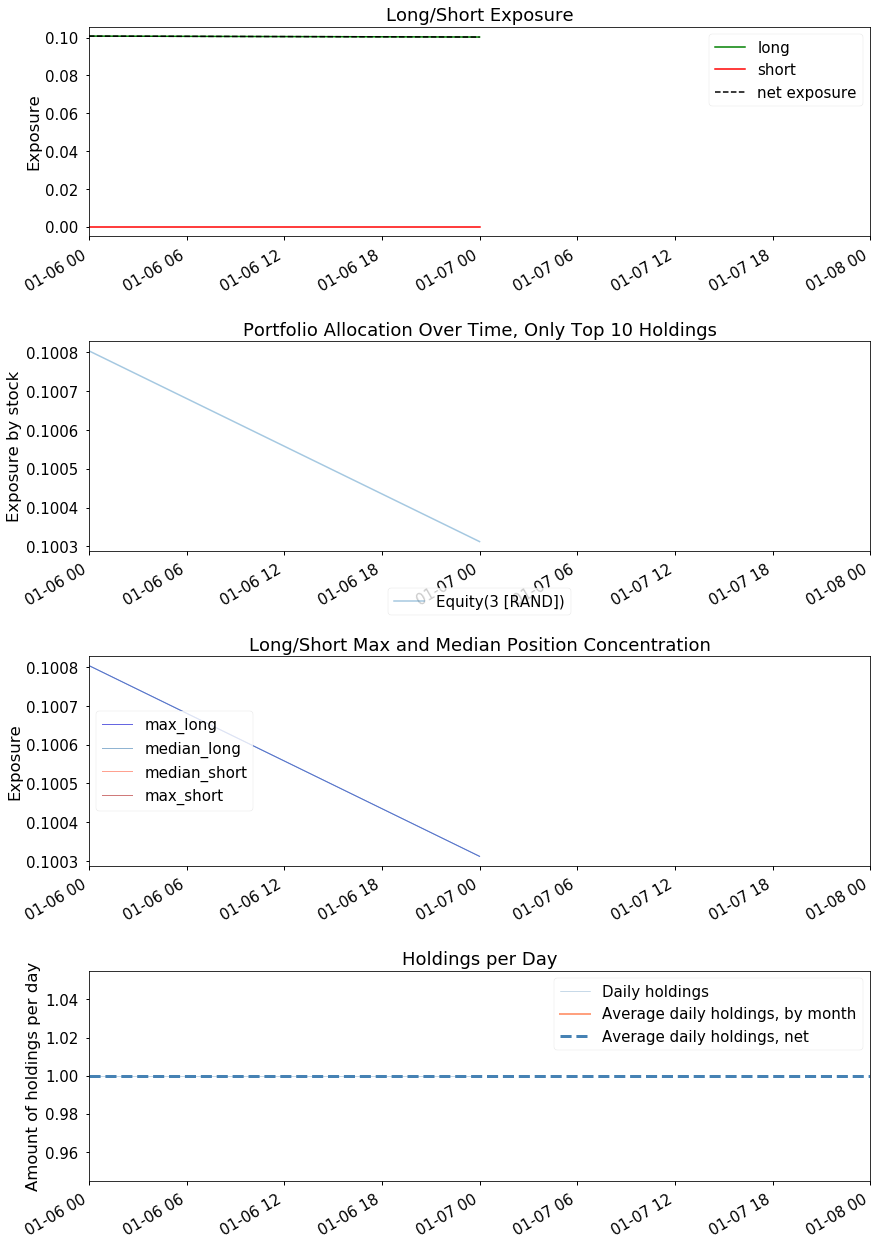

/home/tot/_tot/apps/anaconda3/envs/env-zipline/lib/python3.5/site-packages/pyfolio/plotting.py:1210: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  **kwargs)
/home/tot/_tot/apps/anaconda3/envs/env-zipline/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


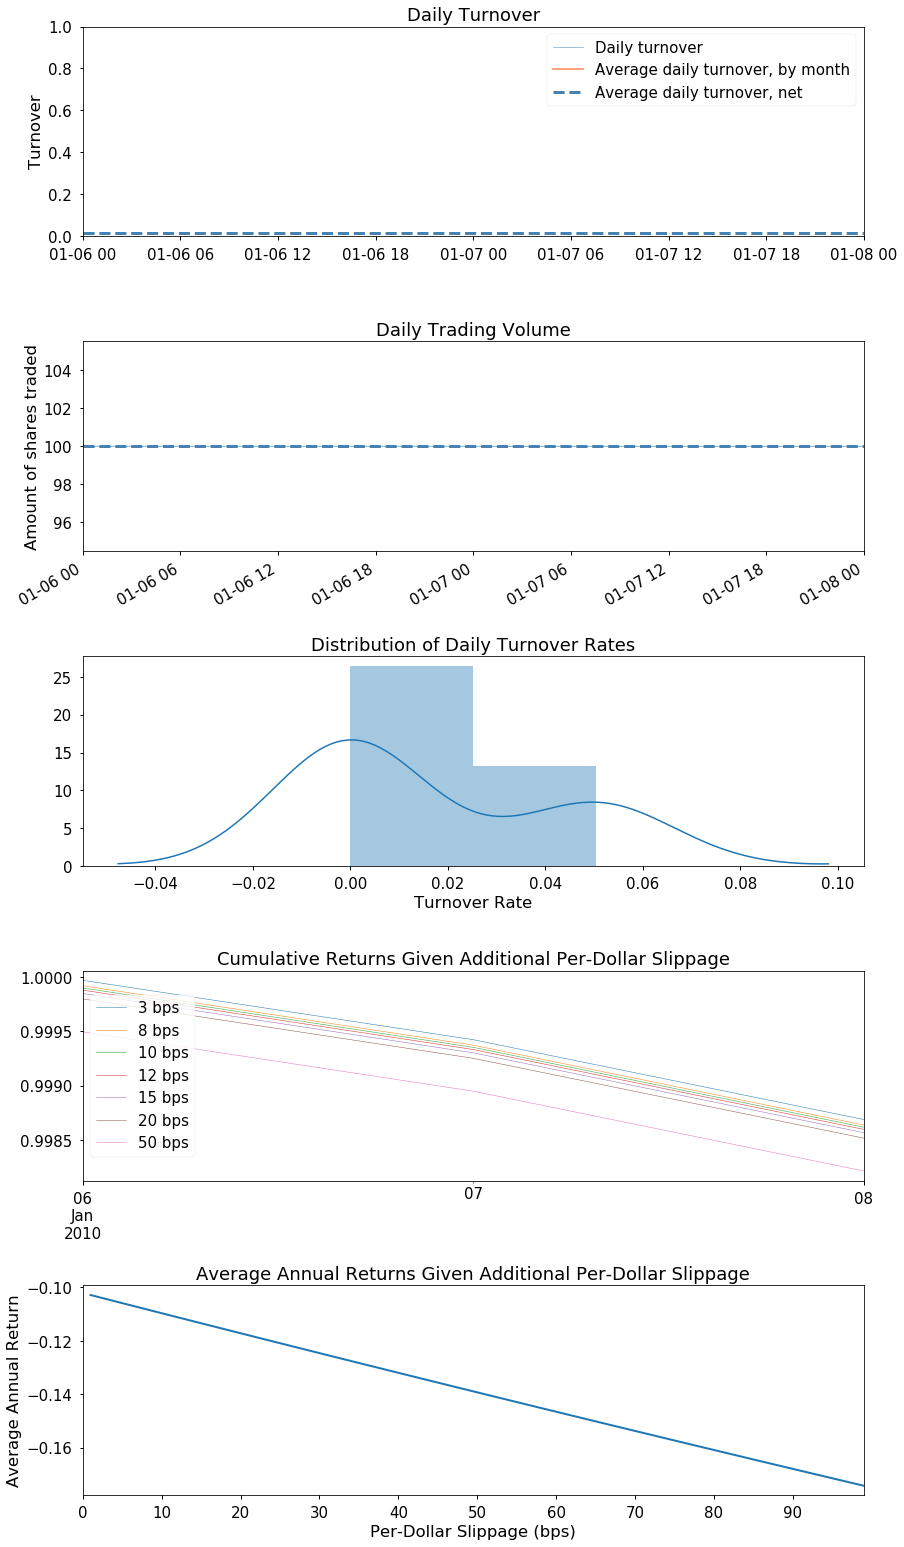

/home/tot/_tot/apps/anaconda3/envs/env-zipline/lib/python3.5/site-packages/pyfolio/tears.py:590: UserWarning: Fewer than 5 round-trip trades made.
               Skipping round trip tearsheet.
  Skipping round trip tearsheet.""", UserWarning)


In [10]:
import pyfolio as pf
returns, positions, transactions, gross_lev = pf.utils.extract_rets_pos_txn_from_zipline(results[:])
benchmark_rets = results['benchmark_period_return'].copy()
benchmark_rets.index = returns.index

pf.create_full_tear_sheet(returns, 
                          positions=positions, 
                          transactions=transactions,
                          live_start_date=None, 
                          round_trips=True, 
                          slippage=0.1,
                          benchmark_rets=benchmark_rets)

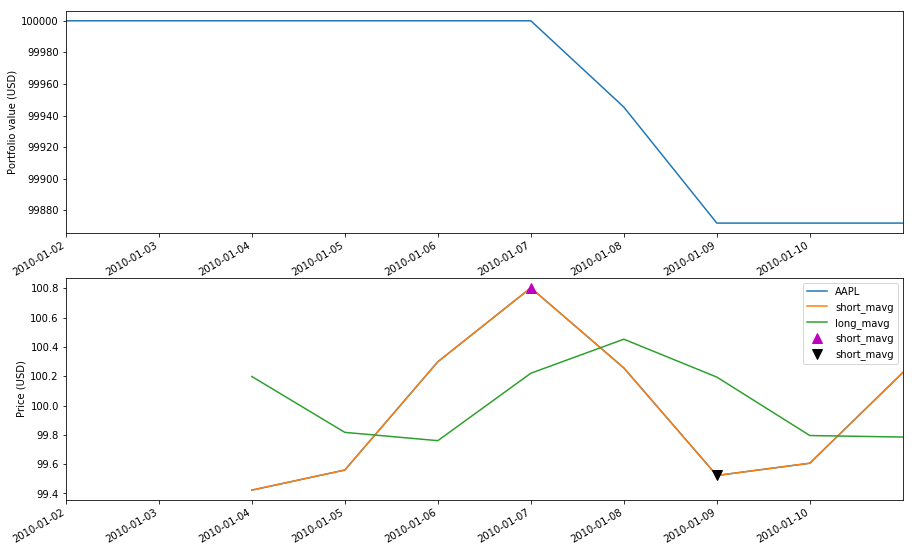

In [11]:
def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    import logbook
    logbook.StderrHandler().push_application()
    log = logbook.Logger('Algorithm')

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')

    ax2 = fig.add_subplot(212)
    ax2.set_ylabel('Price (USD)')

    # If data has been record()ed, then plot it.
    # Otherwise, log the fact that no data has been recorded.
    if ('AAPL' in results and 'short_mavg' in results and
            'long_mavg' in results):
        results['AAPL'].plot(ax=ax2, figsize=(15, 10))
        results[['short_mavg', 'long_mavg']].plot(ax=ax2)

        trans = results.ix[[t != [] for t in results.transactions]]
        buys = trans.ix[[t[0]['amount'] > 0 for t in
                         trans.transactions]]
        sells = trans.ix[
            [t[0]['amount'] < 0 for t in trans.transactions]]
        ax2.plot(buys.index, results.short_mavg.ix[buys.index],
                 '^', markersize=10, color='m')
        ax2.plot(sells.index, results.short_mavg.ix[sells.index],
                 'v', markersize=10, color='k')
        plt.legend(loc=0)
    else:
        msg = 'AAPL, short_mavg & long_mavg data not captured using record().'
        ax2.annotate(msg, xy=(0.1, 0.5))
        log.info(msg)

    plt.show()

analyze(context, results[-300:])

In [12]:
positions.head()
# s = transactions['order_id']
# s[s  == 'c2781e1303744e9c89b9fcb5a6223167']
# transactions[s  == 'c2781e1303744e9c89b9fcb5a6223167']

sid,Equity(3 [RAND]),cash
index,,
2010-01-06 00:00:00+00:00,10080.384252,89919.615748
2010-01-07 00:00:00+00:00,10025.739532,89919.615748
